# Desafio ciências de dados - Incidium

Este projeto foi realizado para resolver o desafio da empresa Indicium visando a vaga de cientista de dados.
O objetivo principal deste projeto é desenvolver um modelo de previsão de preços para aluguéis temporários em Nova York com a finalidade de desenvolver estratégias de precificação competitiva.


##Ajustando o ambiente de trabalho

### Instalando as bibliotecas:

In [435]:
%pip install pandas
%pip install fastapi
%pip install numpy
%pip install plotly
%pip install seaborn
%pip install matplotlib
#%pip install ydata-profiling
%pip install uvicorn python-multipart fastapi kaleido pandas-profiling

In [436]:
%pip install nltk wordcloud
%pip install scikit-learn

### Importando bibliotecas

In [791]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import functools
import nltk
import wordcloud
import pickle
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from ydata_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from nltk.corpus import stopwords
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from IPython.display import Image

##Entrega 1

###Análise exploratória dos dados


### Alocando o conjunto de dados à uma variável


Para facilitar a realização de alterações ou processos que simplifiquem a leitura dos dados ao longo do projeto, é importante atribuir o conjunto de dados a uma variável. No caso em questão, utilizaremos as variáveis dataf e anterior_dataf. A variável dataf será aquela que manipularemos, enquanto anterior_dataf será utilizada para comparação.

In [748]:
dataf = pd.read_csv('teste_indicium_precificacao.csv')
anterior_dataf = pd.read_csv('teste_indicium_precificacao.csv')

###Visualização prévia do conjunto de dados

In [749]:
dataf

id                                               nome   host_id  \
0          2595                              Skylit Midtown Castle      2845   
1          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
2          3831                    Cozy Entire Floor of Brownstone      4869   
3          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
4          5099          Large Cozy 1 BR Apartment In Midtown East      7322   
...         ...                                                ...       ...   
48889  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48890  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48891  36485431            Sunny Studio at Historical Neighborhood  23492952   
48892  36485609               43rd St. Time Square-cozy single bed  30985759   
48893  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name bairro_group              bairro  latitude  longitude  \
0           Jennifer    Manhattan             Midtown     40.75     -73.98   
1          Elisabeth    Manhattan              Harlem     40.81     -73.94   
2        LisaRoxanne     Brooklyn        Clinton Hill     40.69     -73.96   
3              Laura    Manhattan         East Harlem     40.80     -73.94   
4              Chris    Manhattan         Murray Hill     40.75     -73.97   
...              ...          ...                 ...       ...        ...   
48889        Sabrina     Brooklyn  Bedford-Stuyvesant     40.68     -73.95   
48890        Marisol     Brooklyn            Bushwick     40.70     -73.93   
48891  Ilgar & Aysel    Manhattan              Harlem     40.81     -73.95   
48892            Taz    Manhattan      Hell's Kitchen     40.76     -73.99   
48893     Christophe    Manhattan      Hell's Kitchen     40.76     -73.99   

             room_type  price  minimo_noites  numero_de_reviews ultima_review  \
0      Entire home/apt    225              1                 45    2019-05-21   
1         Private room    150              3                  0           NaN   
2      Entire home/apt     89              1                270    2019-07-05   
3      Entire home/apt     80             10                  9    2018-11-19   
4      Entire home/apt    200              3                 74    2019-06-22   
...                ...    ...            ...                ...           ...   
48889     Private room     70              2                  0           NaN   
48890     Private room     40              4                  0           NaN   
48891  Entire home/apt    115             10                  0           NaN   
48892      Shared room     55              1                  0           NaN   
48893     Private room     90              7                  0           NaN   

       reviews_por_mes  calculado_host_listings_count  disponibilidade_365  
0                 0.38                              2                  355  
1                  NaN                              1                  365  
2                 4.64                              1                  194  
3                 0.10                              1                    0  
4                 0.59                              1                  129  
...                ...                            ...                  ...  
48889              NaN                              2                    9  
48890              NaN                              2                   36  
48891              NaN                              1                   27  
48892              NaN                              6                    2  
48893              NaN                              1                   23  

[48894 rows x 16 columns]

Uma das primeiras coisas que podem ser vistas nesse conjunto de dados, é que a coluna de "ultima_review" é preenchida com datas, entretanto, como a biblioteca do pandas não entenderia datas no tipo string, e não se tem garantia de que elas estão no formato `datetime`, será utilizado o código: `dataf["ultima_review"] = pd.to_datetime(dataf.ultima_review)`, para converter as informações na coluna de "ultima_review" para o formato `datetime`, o que permite o pandas a trabalhar com este dado de forma mais eficiente.


In [750]:
dataf["ultima_review"] = pd.to_datetime(dataf.ultima_review)

###Análise das informações gerais dos: conjunto de dados


In [751]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             48894 non-null  int64         
 1   nome                           48878 non-null  object        
 2   host_id                        48894 non-null  int64         
 3   host_name                      48873 non-null  object        
 4   bairro_group                   48894 non-null  object        
 5   bairro                         48894 non-null  object        
 6   latitude                       48894 non-null  float64       
 7   longitude                      48894 non-null  float64       
 8   room_type                      48894 non-null  object        
 9   price                          48894 non-null  int64         
 10  minimo_noites                  48894 non-null  int64         
 11  numero_de_revie

Ao utilizar a função `info()` do pandas, é possível obter uma visão geral dos dados, incluindo o número de entradas, o número de colunas, os tipos de dados e a quantidade de entradas não nulas em cada coluna. No entanto, para uma melhor visibilidade da quantidade de entradas nulas no projeto, será utilizada a função:`dataf.isnull().sum()`, que retorna a soma da quantidade de valores nulos.

In [752]:
dataf.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [753]:
dataf.nunique()

id                               48894
nome                             47904
host_id                          37457
host_name                        11452
bairro_group                         5
bairro                             221
latitude                         19048
longitude                        14718
room_type                            3
price                              674
minimo_noites                      109
numero_de_reviews                  394
ultima_review                     1764
reviews_por_mes                    937
calculado_host_listings_count       47
disponibilidade_365                366
dtype: int64

Agora é possível verificar com uma maior clareza de que as colunas "nome" , "host_name", "ultima_review" e "reviews_por_mes" possuem valores vazios, os quais para uma análise mais eficiente dos dados, necessitarão de ser tratadas, porém, antes de iniciar o tratamento dos dados, é importante visualizar a quantidade de valores únicos em cada coluna. Isso ajuda a determinar como lidar com células vazias e a interpretar o significado de cada coluna no conjunto de dados. Por exemplo:

Ao observar os valores não únicos, é perceptível que as colunas "id" e "nome" variam consideravelmente, o que as torna mais difíceis de leva-las em consideração em uma análise geral.

Além disso , é possível observar que as colunas de `bairro_group` e `room_type`, variam muito pouco, o que pode nos dar uma brecha de que dependendo de suas funções no contexto do conjunto de dados funções, elas podem ser **variáveis catagóricas**.

In [754]:
dataf['reviews_por_mes'] = dataf['reviews_por_mes'].fillna(dataf['reviews_por_mes'].mean())#substitui os valores nulos pela média da coluna.
dataf.ultima_review.fillna(method="bfill", inplace=True) #Substitui os valores nulos com o valor da próxima linha válida.
#Substitui o restante dos valores vazios em cada coluna, que possua valores vazios, com a moda de suas colunas.
for column in dataf.columns:
    if dataf[column].isnull().sum() != 0:
        dataf[column] = dataf[column].fillna(dataf[column].mode()[0])

Sendo assim o tratamento escolhido aos valores vazios de cada coluna será:
*  "nome" e "host_name" : Como os dados em questão são objetos que guardam um tipo de informação muito variável e que não são cruciais, será utilizado do método no qual as células vazias serão preenchidas com o valor mais comum de cada coluna.
*  "reviews_por_mes" : Como este é um valor numérico interessante para futuras avaliações, não se pode apenas preencher os valores vazios com zeros ou qualquer outros valores, pois assim estaríamos tornando esta variável muito tendenciosa, neste caso, será utilziada a média dos valores gerais, o que torna o preenchimento mais leve.

*  "ultima_review": Pelo fato de esta coluna ser importante para a análise, e possuir valores de data, vazios ,  será utilizado o método "bfill" , o qual preencherá os valores ausentes na coluna com o valor próximo valor válido encontrado ao longo da mesma, ao fazer isso, estará mudando um pouco a realidade dos fatos, mas torna-se possível a utilização deste dado para futuras leituras.

In [755]:
dataf.isnull().sum()

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

Com todas as manipulações realizadas, é possível retirar a prova de que o conjunto de dados não possui mais nenhum valor nulo.

In [756]:
# Descrição estatística do dataset pré alterações
anterior_dataf ['reviews_por_mes'].describe()

count   38842.00
mean        1.37
std         1.68
min         0.01
25%         0.19
50%         0.72
75%         2.02
max        58.50
Name: reviews_por_mes, dtype: float64

In [757]:
# Descrição estatística do dataset pós alterações
dataf['reviews_por_mes'].describe()

count   48894.00
mean        1.37
std         1.50
min         0.01
25%         0.28
50%         1.22
75%         1.58
max        58.50
Name: reviews_por_mes, dtype: float64

Ao utilizar o método `describe()` do pandas, é possível obter uma descrição estatística resumida de uma coluna de dados, sendo eles:

* count: O número total de observações na coluna.
* mean: A média dos valores na coluna.
* std: O desvio padrão dos valores na coluna.
* min: O valor mínimo na coluna.
* 25% (primeiro quartil): O valor que divide os dados em 25% dos valores menores.
* 50% (mediana): O valor que divide os dados em duas partes iguais.
* 75% (terceiro quartil): O valor que divide os dados em 75% dos valores menores.
* max: O valor máximo na coluna.

estes valores são importantes para entender a estrutura e as características dos dados, identificar padrões, outliers e tomar decisões baseadas em análise.


Será utilizada essa função, visando inicialmente apenas o conjunto da coluna de "reviews_por_mes", pois, com a alteraçaõ nos preenchimentos dos valores vazios, esta coluna apresentou mudanças mais significativas.


* O número total de observações (count) aumentou de 38842 para 48894 após a aplicação das transformações, indicando que os valores vazios foram preenchidos.

* As alterações não mudaram o valor médio da coluna (mean), o que é interessante, já prova que mesmo com a mudança foi possível manter a integridade estatística dos dados.

* O desvio padrão (std) diminuiu ligeiramente de 1.680453 para 1.497781 após as transformações, o que pode sugerir uma redução na dispersão dos dados.

* Os valores dos quartis (25%, 50%, 75%) sofreram pequenas alterações após as transformações o que reflete as mudanças na distribuição dos dados após o preenchimento.

In [758]:
pd.set_option('display.float_format', '{:.2f}'.format)#Formato da tabela para ficar mais legível
dataf.describe()

id      host_id  latitude  longitude    price  minimo_noites  \
count    48894.00     48894.00  48894.00   48894.00 48894.00       48894.00   
mean  19017532.13  67621393.58     40.73     -73.95   152.72           7.03   
std   10982884.05  78611176.15      0.05       0.05   240.16          20.51   
min       2595.00      2438.00     40.50     -74.24     0.00           1.00   
25%    9472370.75   7822736.75     40.69     -73.98    69.00           1.00   
50%   19677431.50  30795529.00     40.72     -73.96   106.00           3.00   
75%   29152249.25 107434423.00     40.76     -73.94   175.00           5.00   
max   36487245.00 274321313.00     40.91     -73.71 10000.00        1250.00   

       numero_de_reviews  reviews_por_mes  calculado_host_listings_count  \
count           48894.00         48894.00                       48894.00   
mean               23.27             1.37                           7.14   
std                44.55             1.50                          32.95   
min                 0.00             0.01                           1.00   
25%                 1.00             0.28                           1.00   
50%                 5.00             1.22                           1.00   
75%                24.00             1.58                           2.00   
max               629.00            58.50                         327.00   

       disponibilidade_365  
count             48894.00  
mean                112.78  
std                 131.62  
min                   0.00  
25%                   0.00  
50%                  45.00  
75%                 227.00  
max                 365.00

Na tabela acima pode ser vista a descrição estatística de toda o conjunto de dados após a mudança, todos com o seu count padronizados, e suas disperções.

In [759]:
dataf.drop('id',axis=1,inplace=True)

Devido à falta de relevância dos dados na coluna de id para a análise em questão, é considerável remover a mesma para obter um conjunto de dados mais limpo.

###Visualização gráfica dos dados

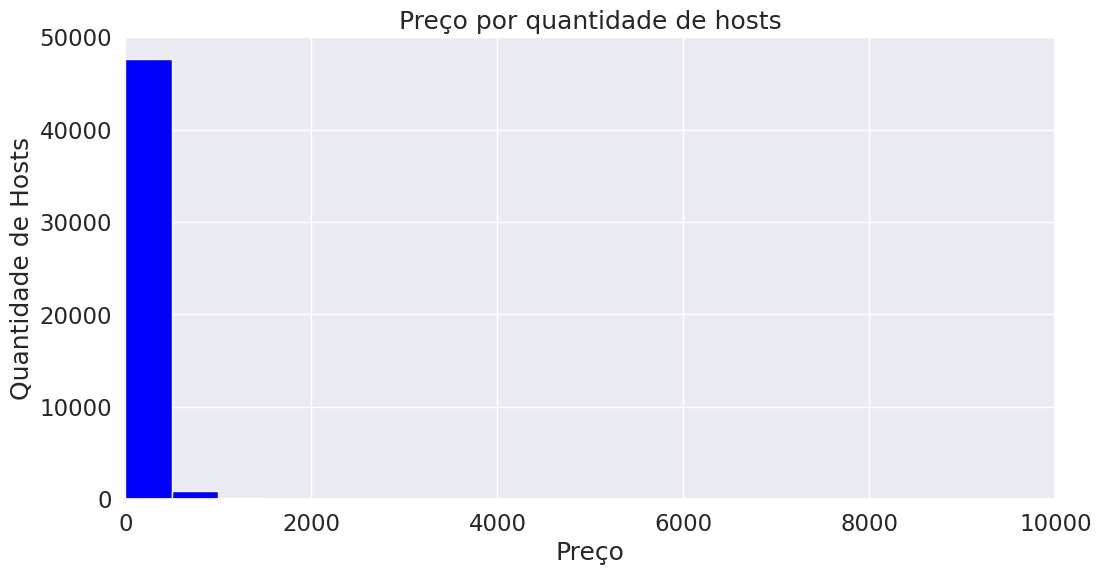

In [760]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(dataf['price'], bins=20, color='blue', linewidth=1, edgecolor='white')
plt.xlim(0, 10000)
plt.ylim(0, 50000)

plt.xlabel('Preço')
plt.ylabel('Quantidade de Hosts')
plt.title('Preço por quantidade de hosts')

plt.show()


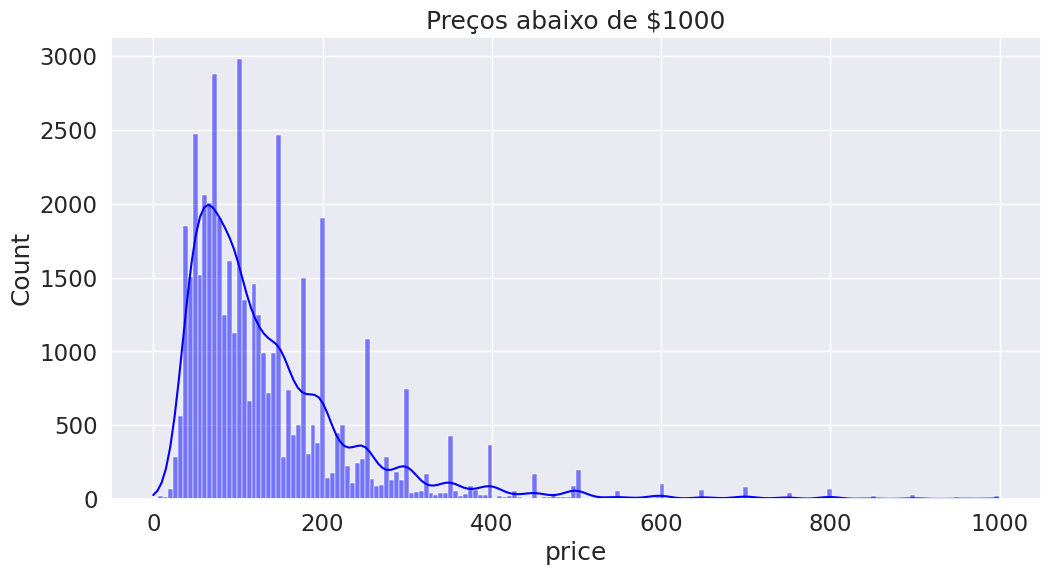

In [761]:
fig, ax= plt.subplots(figsize=(12,6))

plt.title("Preços abaixo de $1000")
sns.histplot(dataf[dataf['price'] < 1000]['price'], kde=True,color='blue', edgecolor='white')

fig.show()

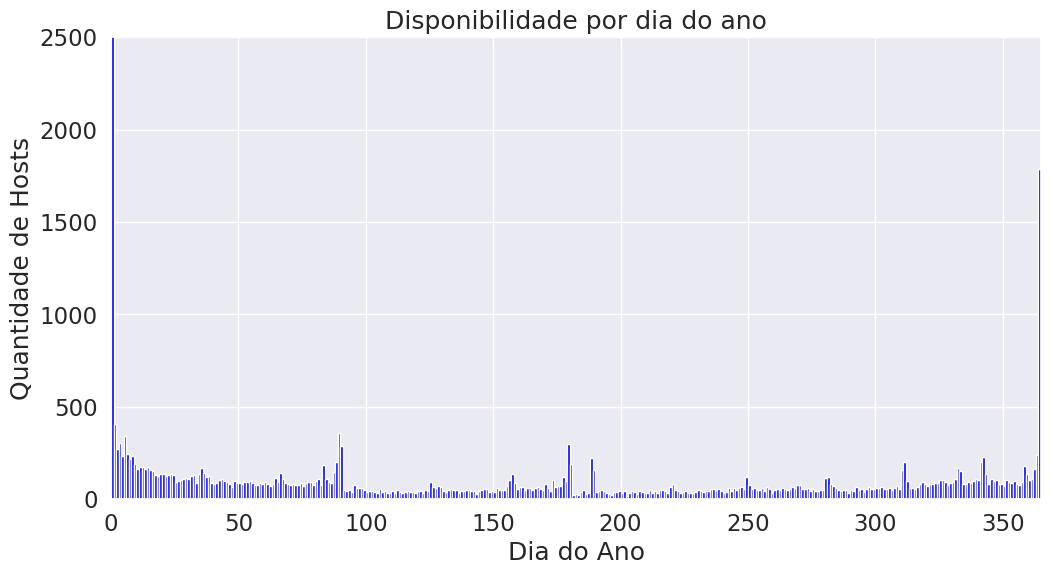

In [762]:
plt.figure(figsize=(12, 6))
plt.hist(dataf['disponibilidade_365'], bins=365, color='blue',linewidth=1 , edgecolor = "white")
plt.xlim(0, 365)
plt.ylim(0,2500)
plt.xlabel('Dia do Ano')
plt.ylabel('Quantidade de Hosts')
plt.title('Disponibilidade por dia do ano')
plt.show()

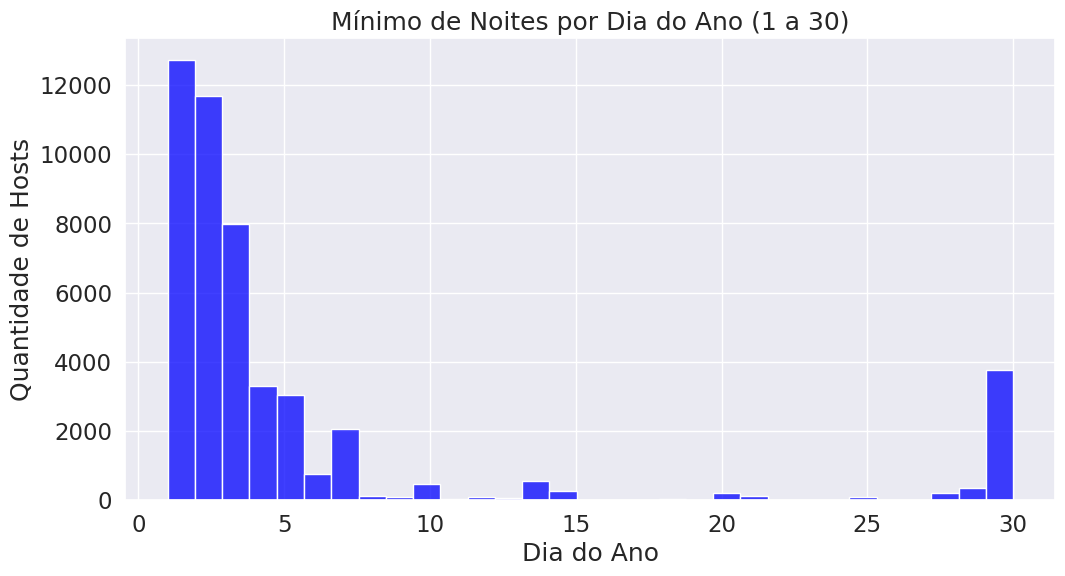

In [763]:
plt.figure(figsize=(12, 6))

percentile_90 = np.percentile(dataf['minimo_noites'], 95)
sns.histplot(dataf[(dataf['minimo_noites'] <= percentile_90) & (dataf['minimo_noites'] > 0)]['minimo_noites'], bins= int(percentile_90)+1, color='blue', edgecolor='white')
plt.xlabel('Dia do Ano')
plt.ylabel('Quantidade de Hosts')
plt.title(f'Mínimo de Noites por Dia do Ano (1 a {int(percentile_90)})')
plt.show()

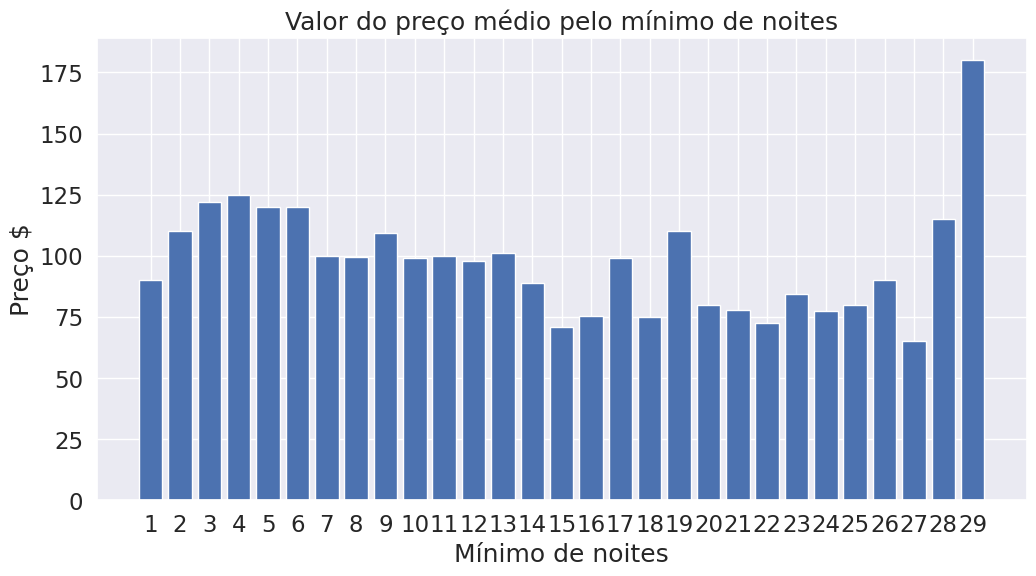

In [764]:
fig = plt.figure(figsize=(12,6))
plt.xticks(np.arange(min(d.keys().tolist()), max(d.keys().tolist())+1, 1.0))
plt.bar(d.keys().tolist(), d.tolist())
plt.title('Valor do preço médio pelo mínimo de noites')
plt.xlabel('Mínimo de noites')
plt.ylabel('Preço $')
plt.grid(True)

Utilizando a biblioteca Matplotlib para a geração de gráficos, podem ser feitas análises visuais importantes sobre os dados, como nos seguintes casos:

* Preço: A maioria dos hosts define o preço do aluguel entre 0 e 1000 dólares.

* Disponibilidade: Grande parte dos hosts não está disponível para aluguel durante todo o ano.

* Mínimo de noites: Nota-se que a maioria dos hosts não estabelece uma quantidade mínima maior do que 1 de dias para o aluguel , 95% do conjunto de dados, se mantém em até 29 dias, no mínimo.

* Latitude e Longitude: Ao visualizar as localizações dos apartamentos pela sua latitude e longitude, pode se visualizar um padrão de distribuição dos apartamentos pela cidade.

* numero_de_reviews: É possível obter um espectro da popularidade de um apartamento, a partir de seu número de reviews.


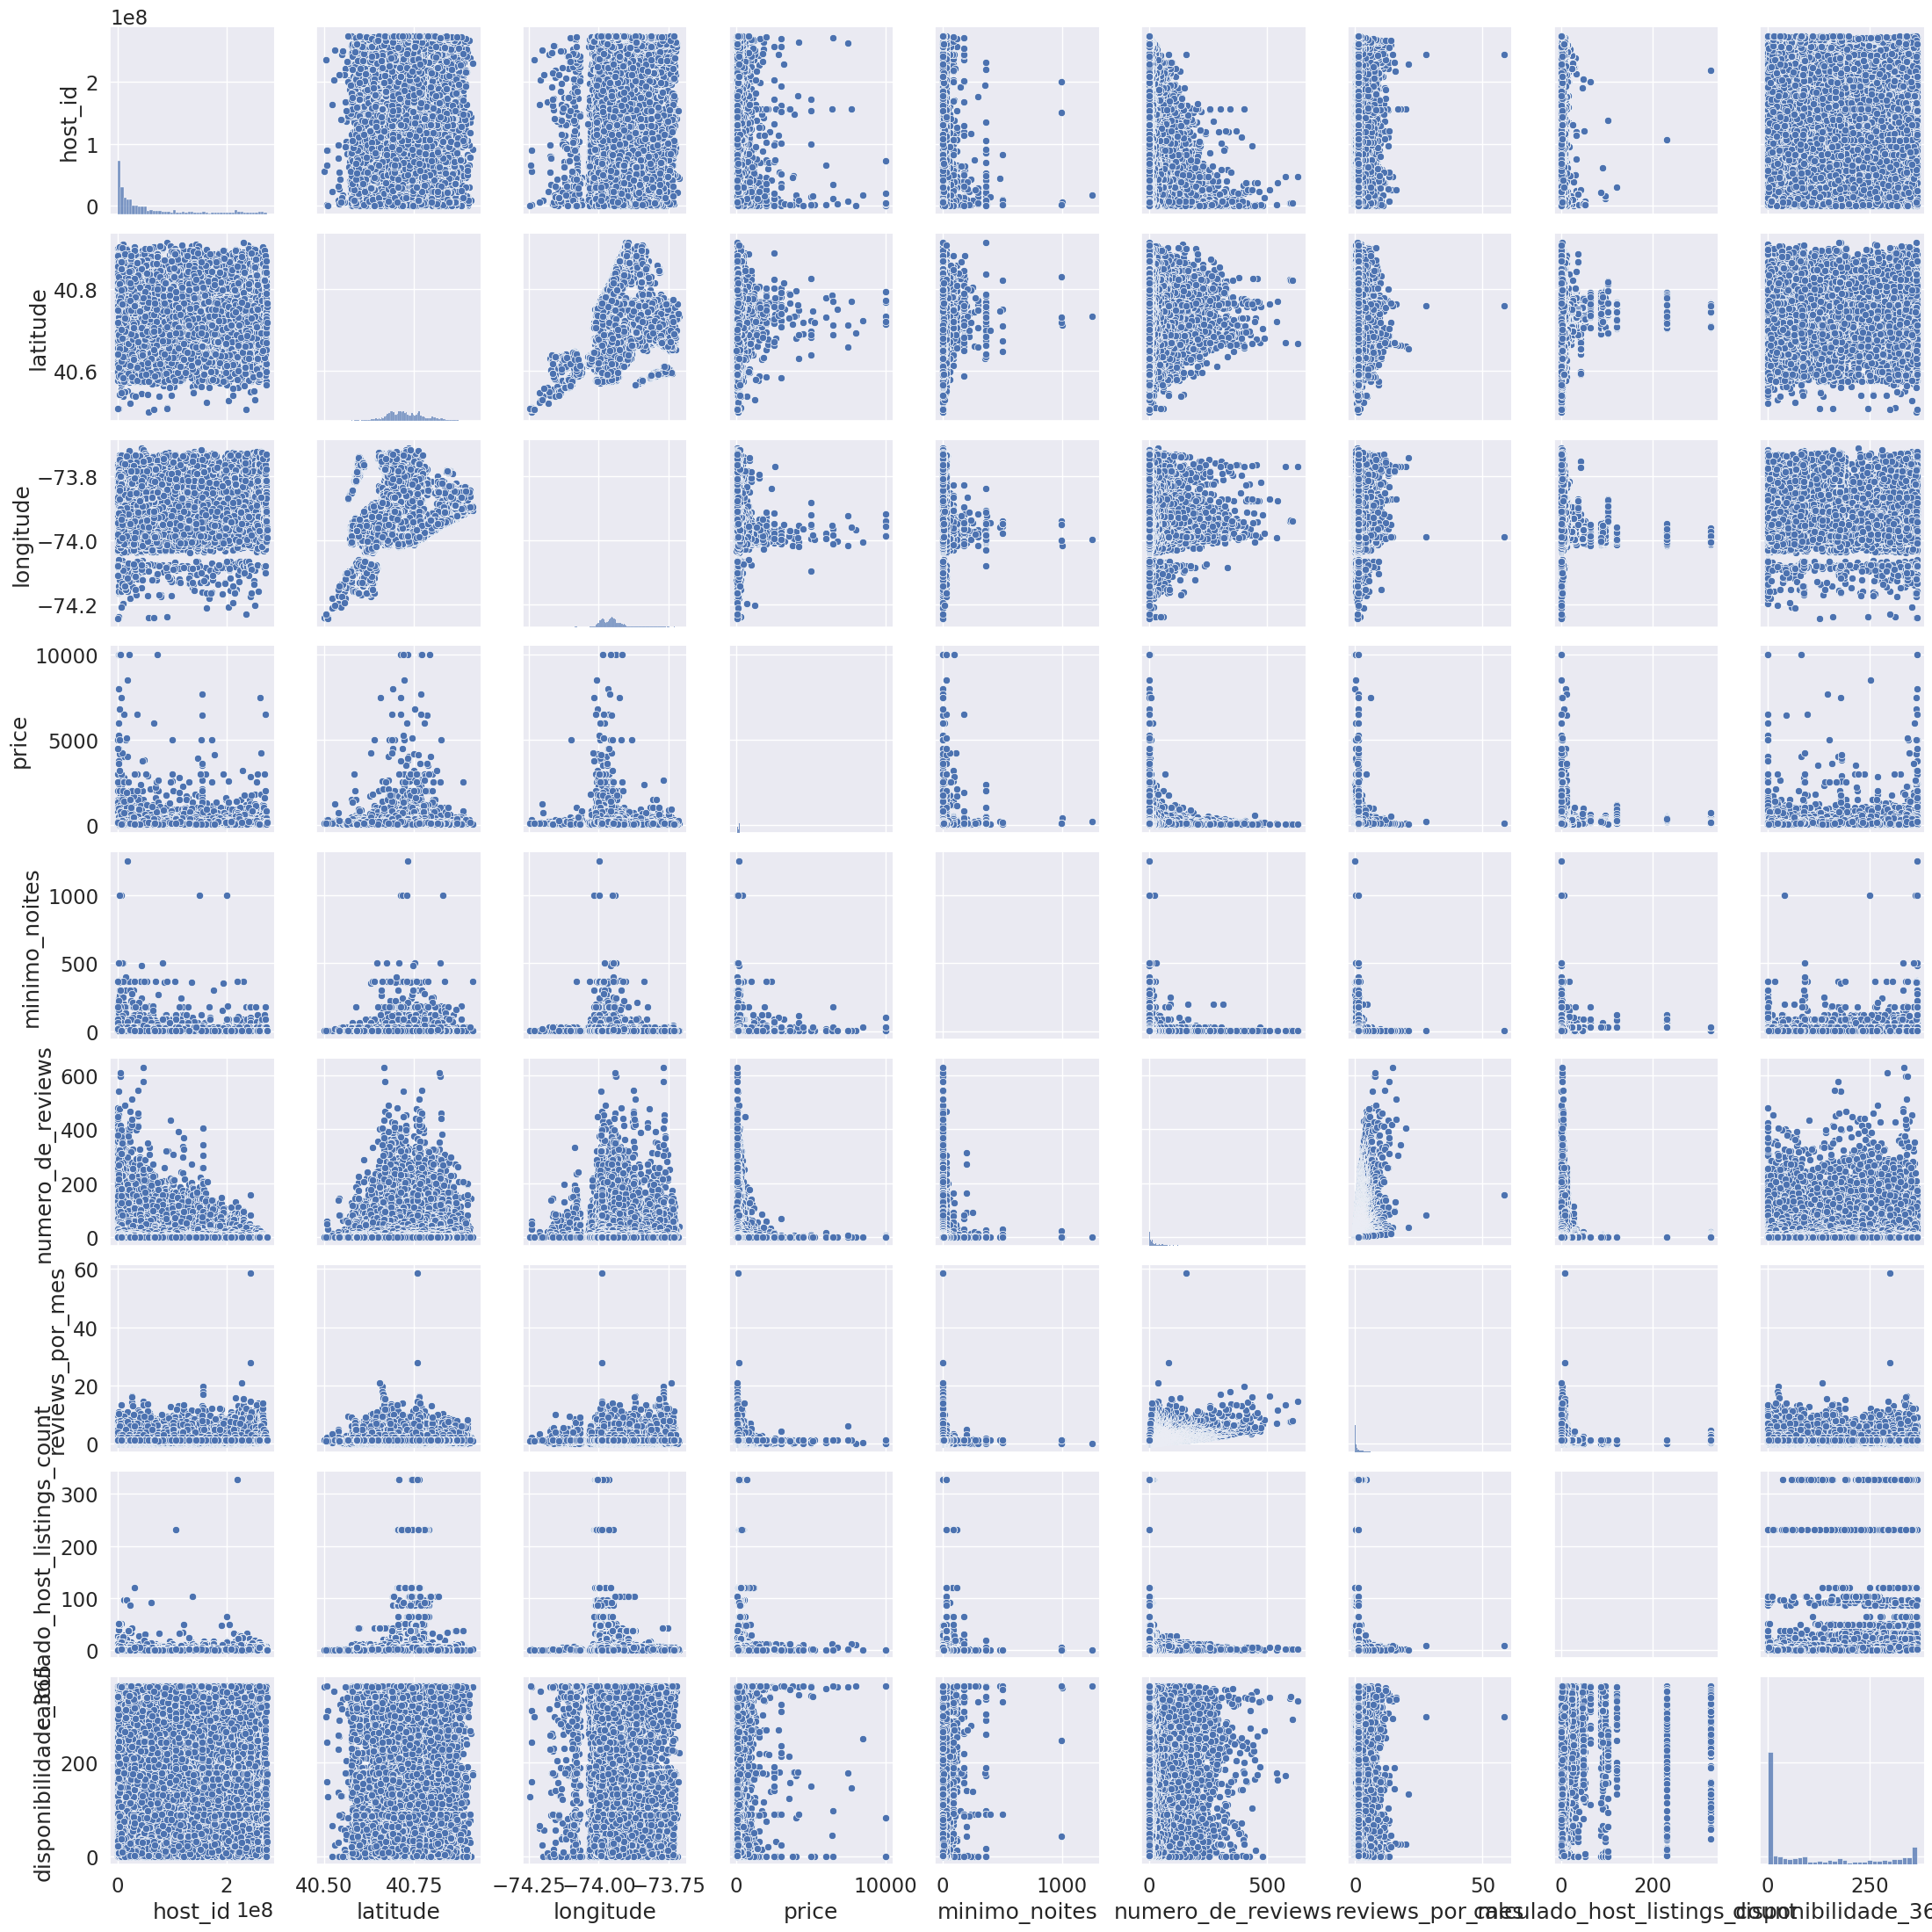

In [765]:
sns.pairplot(dataf)

Para uma visualização geral dos dados, foi utilizada a função `pairplot()` do seaplot, na qual plota um histograma de todas as combinações de variáveis no conjunto de dados, nele podemos ver correlações como variação do preço pelo número de comentários, variaçaõ do preço pela posição global,...

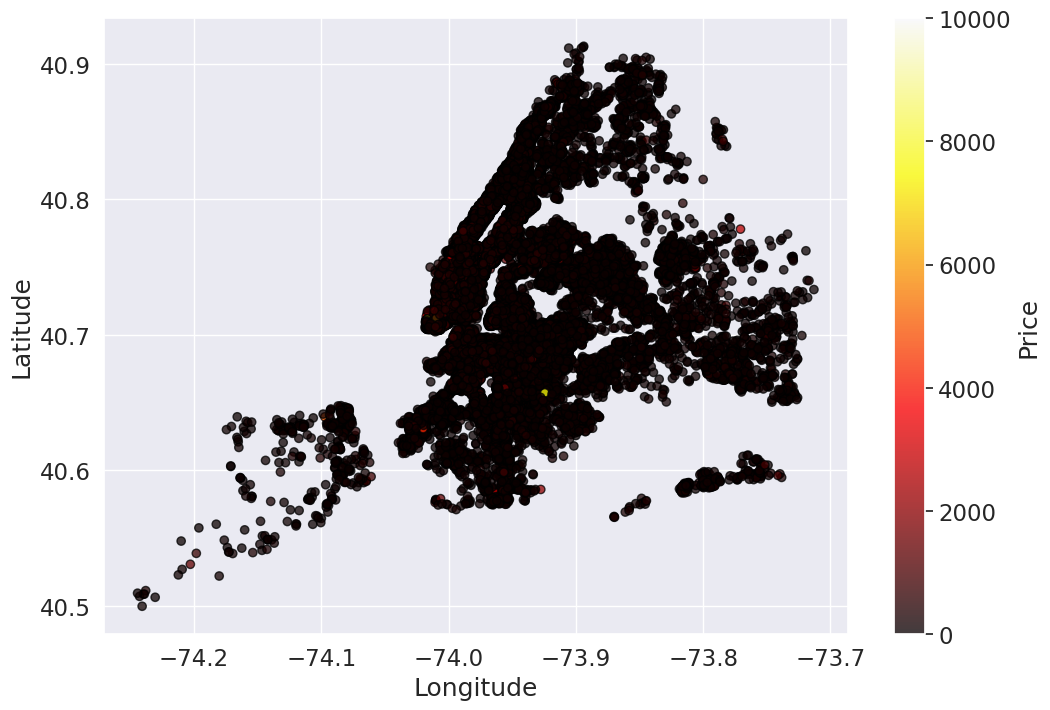

In [766]:
plt.figure(figsize=(12, 8))
plt.scatter(dataf.longitude, dataf.latitude, c=dataf.price, cmap='hot', edgecolor='black', linewidth=1, alpha=0.75)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
cbar = plt.colorbar()
cbar.set_label('Price')

A análise da distribuição de preços com base na localização geográfica dos imóveis pode ser realizada por meio de um gráfico de dispersão da latitude pela longitude, colorido de acordo com os preços. No entanto, devido à alta densidade de pontos, a visualização pode ser prejudicada, dificultando a identificação de padrões ou áreas de maior valor. Nesse caso, outras abordagens podem ser necessárias para uma análise mais eficaz dos dados.

###Avaliação dos dados categóricos

Neste ponto é relevante conduzir uma análise das variáveis que não foram previamente analizadas. Essas variáveis podem ser categóricas e são importantes para a compreensão do conjunto de dados.

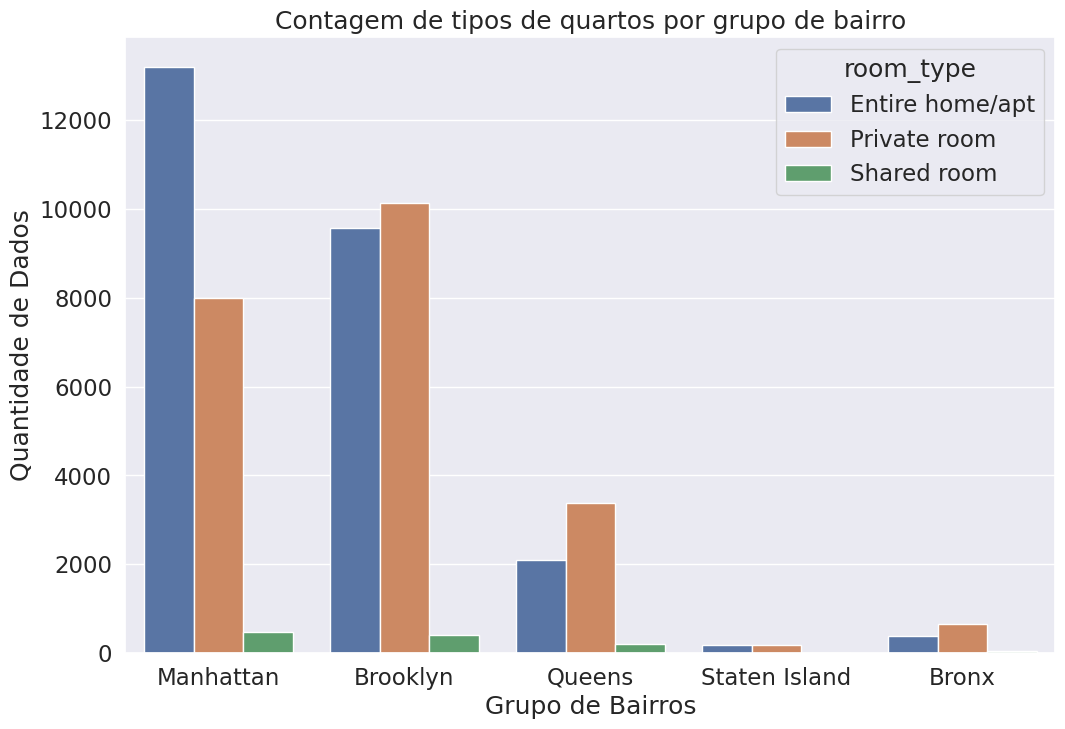

In [767]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)

sns.countplot(x="bairro_group", hue="room_type", data=dataf)
plt.title('Contagem de tipos de quartos por grupo de bairro')
plt.xlabel('Grupo de Bairros')
plt.ylabel('Quantidade de Dados')
plt.show()

A partir da análise da contagem de tipos de quartos por grupo de bairros, observa-se que Manhattan e Brooklyn destacam-se como as áreas com a maior quantidade de hosts. Além disso, nota-se que a maioria dos tipos de quartos são da categoria casa/apartamento completos.

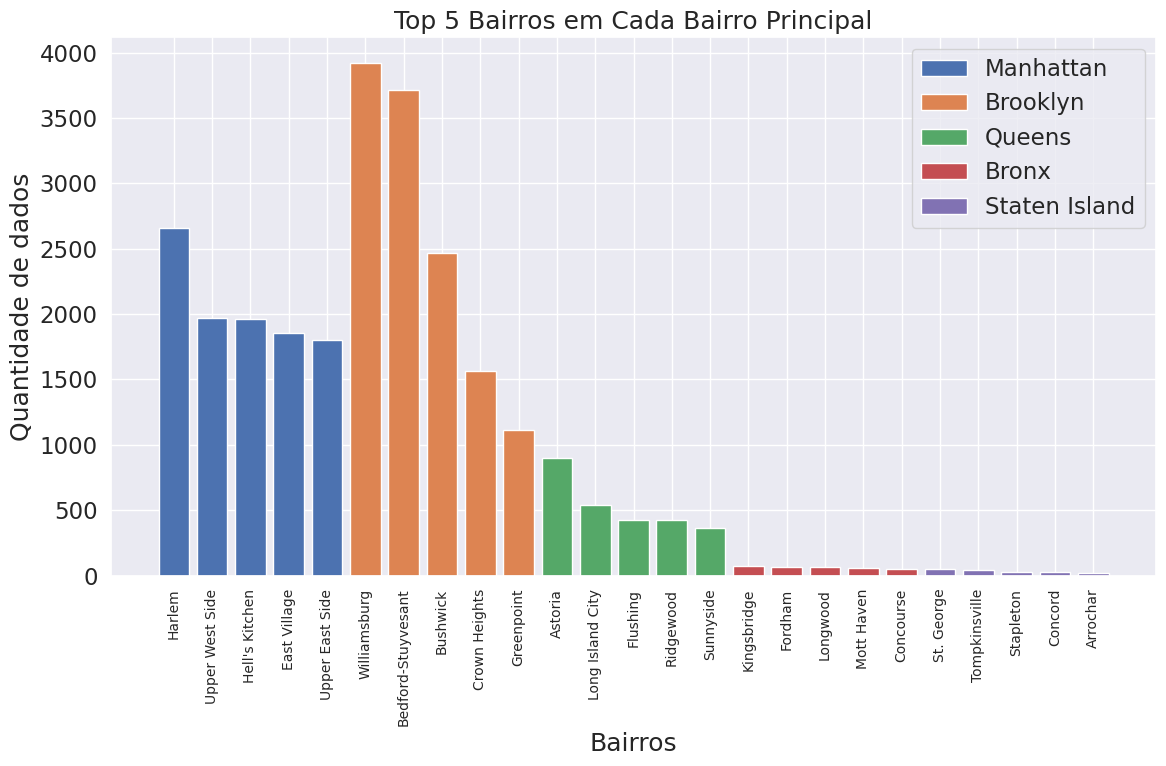

In [768]:
group_bairros = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']


plt.figure(figsize=(12, 8))

for bairro_principal in group_bairros:
    dados_bairro_principal = dataf[dataf['bairro_group'] == bairro_principal]
    quantidade_por_bairro = dados_bairro_principal['bairro'].value_counts()
    top_5_bairros = quantidade_por_bairro.head(5)
    plt.bar(top_5_bairros.index, top_5_bairros.values, label=bairro_principal)


plt.title('Top 5 Bairros em Cada Bairro Principal')
plt.xlabel('Bairros')
plt.ylabel('Quantidade de dados')
plt.xticks(rotation=90, fontsize=10)
plt.legend()


plt.tight_layout()
plt.show()


Baseando-se nisso, é possível também , obter um gráfico dos cinco bairros mais populares de caga grupo de bairro, dada a leitura do gráfico, é possível analisar que Brooklyn possui o bairro mais popular, apesar de Manhattan ser detentora da maior quantidade de hosts.

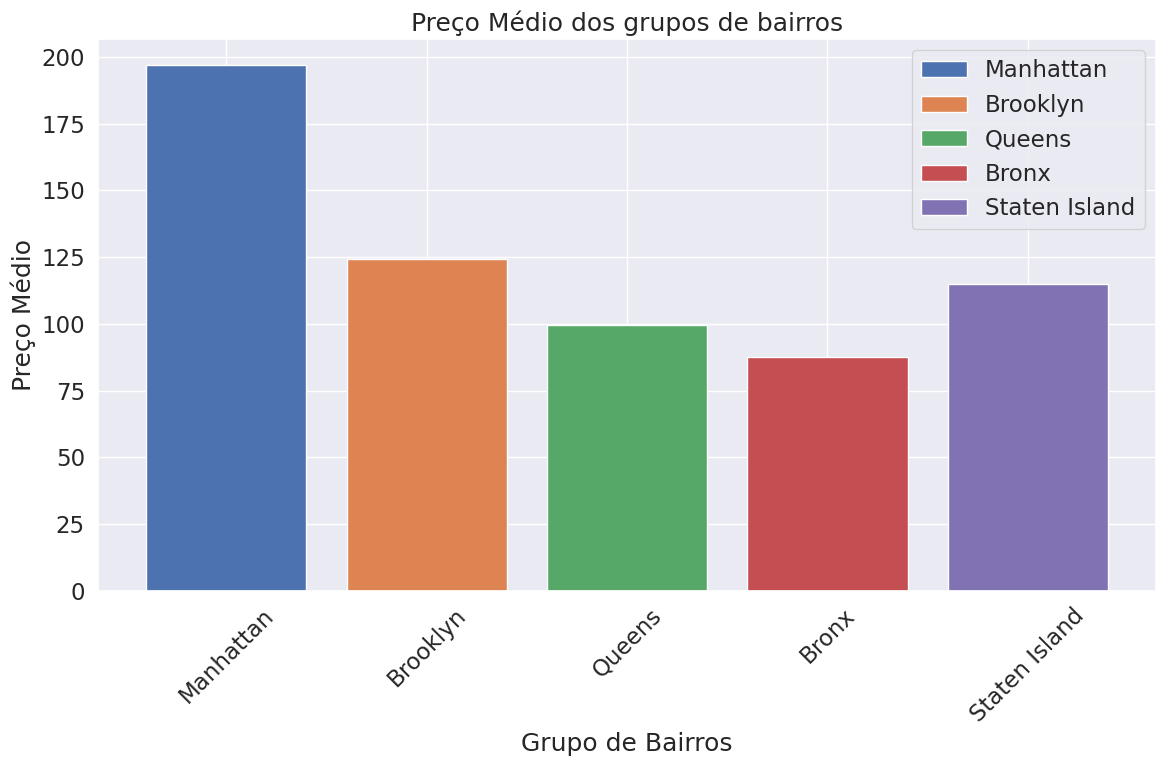

In [769]:
group_bairros = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

plt.figure(figsize=(12, 8))

for bairro_principal in group_bairros:
    dados_bairro_principal = dataf[dataf['bairro_group'] == bairro_principal]

    preco_medio_bairro_principal = dados_bairro_principal['price'].mean()

    plt.bar(bairro_principal, preco_medio_bairro_principal, label=bairro_principal)

plt.title('Preço Médio dos grupos de bairros')
plt.xlabel('Grupo de Bairros')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


No entanto, se for verificada o preço médio dos hotéis em cada grupo de bairros, é possível analisar que Manhattan, possui os hoteis com os valores mais elevados.

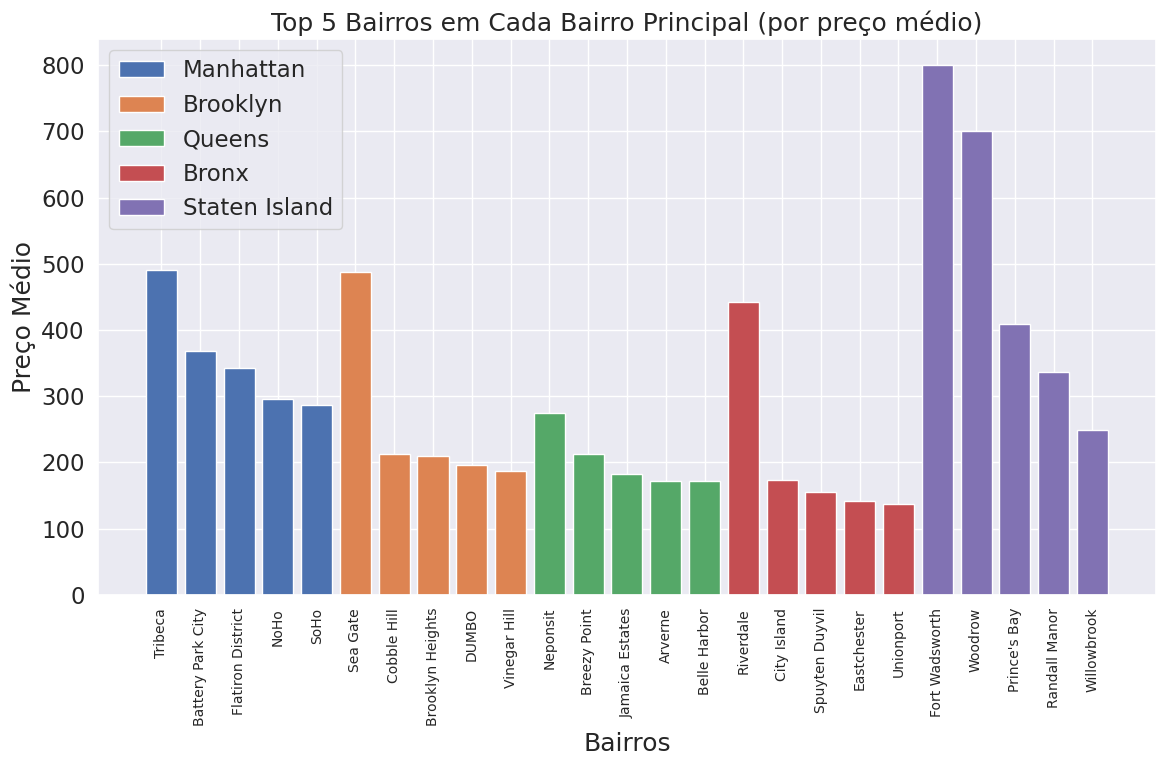

In [770]:
group_bairros = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

plt.figure(figsize=(12, 8))

for bairro_principal in group_bairros:
    dados_bairro_principal = dataf[dataf['bairro_group'] == bairro_principal]
    preco_medio_por_bairro = dados_bairro_principal.groupby('bairro')['price'].mean()
    top_5_bairros = preco_medio_por_bairro.nlargest(5)  # Ordena os bairros pelo preço médio e pega os top 5
    plt.bar(top_5_bairros.index, top_5_bairros.values, label=bairro_principal)

plt.title('Top 5 Bairros em Cada Bairro Principal (por preço médio)')
plt.xlabel('Bairros')
plt.ylabel('Preço Médio')
plt.xticks(rotation=90, fontsize=10)
plt.legend()

plt.tight_layout()
plt.show()

No entanto, em termos de bairros com os aluguéis mais caros, Staten Island se destaca significativamente. Vale ressaltar que isso pode ser atribuído à escassez de opções de aluguel na região, o que faz com que as propriedades disponíveis em determinadas regiões sejam mais caras do que a outra, como no caso do Fort Wadsworth.

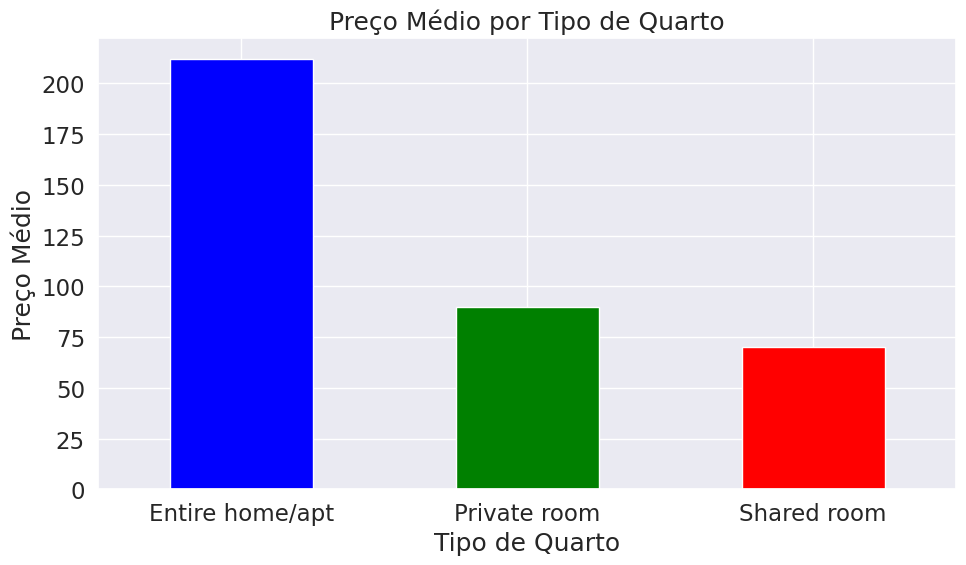

In [771]:
# Calculo do preço médio de cada tipo de quarto
preco_medio_por_tipo_quarto = dataf.groupby('room_type')['price'].mean()

plt.figure(figsize=(10, 6))
cores = ['blue', 'green', 'red'] # Definição de cores para cada tipo de quarto
preco_medio_por_tipo_quarto.plot(kind='bar', color=cores, edgecolor='white')
plt.title('Preço Médio por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Preço Médio')
plt.xticks(rotation=360)

plt.tight_layout()
plt.show()

É importante realizar o cálculo do valor médio para cada tipo de quarto, pois isso oferece informações sobre as variações de preços entre diferentes categorias de hospedagem. Observa-se que alugar uma casa ou apartamento inteiro tende a apresentar um preço médio mais vantajoso em comparação com outros tipos de quartos disponíveis.

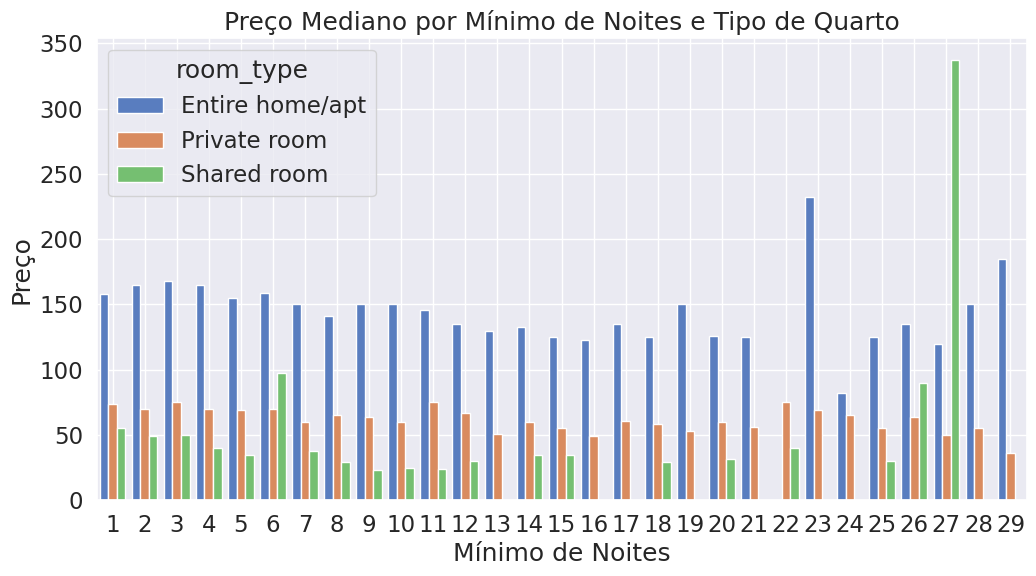

In [772]:
filtered_data = dataf[dataf['minimo_noites'] < percentile_90]

grouped_data = filtered_data.groupby(['minimo_noites', 'room_type'])['price'].median().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='minimo_noites', y='price', hue='room_type', data=grouped_data, palette='muted')
plt.title('Preço Mediano por Mínimo de Noites e Tipo de Quarto')
plt.xlabel('Mínimo de Noites')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

É possível analisar a partir do gráfico 'Preço Mediano por Mínimo de Noites e Tipo de Quarto', que alugar um quarto privado é consistentemente mais barato, e também que é mais barato na mediana, alugar os imóveis por uma quantidade maior de dias.
(Utilizar a média para calcular os valores dos custos, poderia gerar uma taxa de erro grande e não desejada).

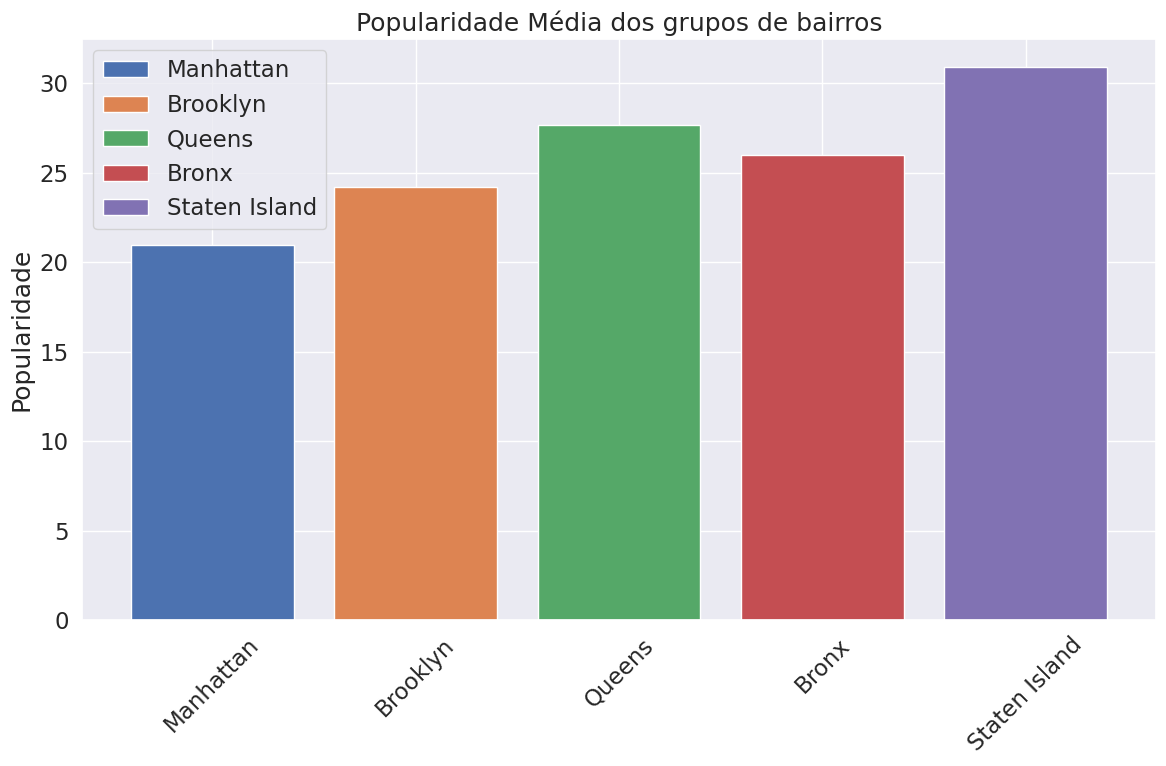

In [773]:
import matplotlib.pyplot as plt

group_bairros = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

plt.figure(figsize=(12, 8))

for bairro_principal in group_bairros:
    dados_bairro_principal = dataf[dataf['bairro_group'] == bairro_principal]

    preco_medio_bairro_principal = dados_bairro_principal['numero_de_reviews'].mean()

    plt.bar(bairro_principal, preco_medio_bairro_principal, label=bairro_principal)

plt.title('Popularidade Média dos grupos de bairros')
plt.ylabel('Popularidade')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

Ao analisar a popularidade média dos grupos de bairros, é relevante considerar a distribuição da quantidade de hosts em cada área. Por exemplo, mesmo que Staten Island tenha uma quantidade limitada de hosts ela pode possuir um maior número de comentários. Por outro lado, em áreas como Manhattan, com uma concentração mais densa de hosts, a quantidade de comentários por estabelecimento pode ser relativamente menor, apesar do maior número total de hosts.

Vale levar em consideração também , que não é definido se o comentário é positivo ou negativo, sendo assim, a populariadede calculada , é baseada na quantidade de pesosas que já frequentaram e tiveram algo á comentar.



##Entrega 2  

###Pergunta A

A partir dos dados analizados em questão de preço, popularidade é mais interenssante a compra de um apartamento em Manhattan na região de Harlem devido não só á sua popularidade como também estar próximo aos pontos turisticos da cidade como os exemplos pontuados no mapa.

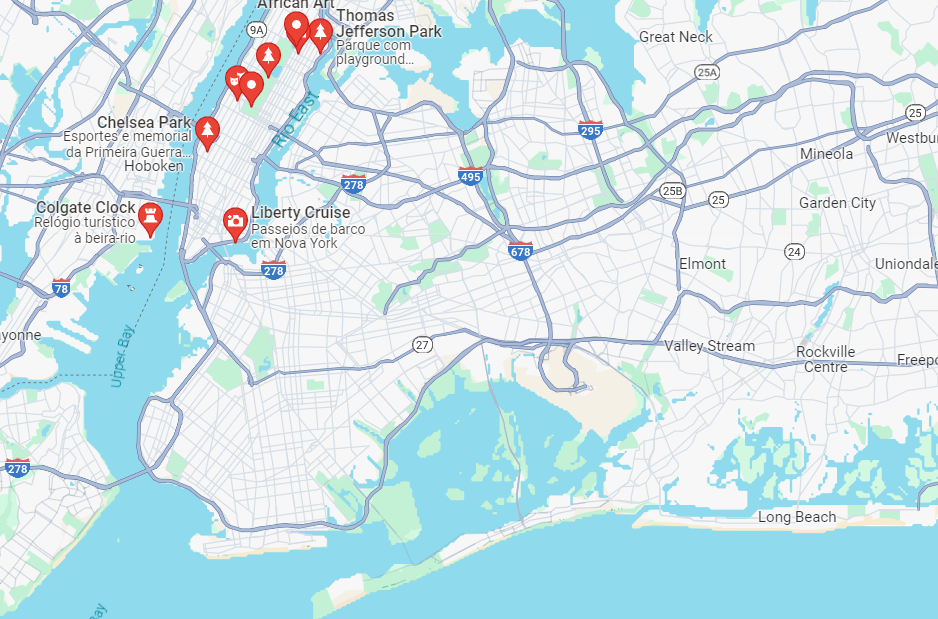

In [774]:
Image(filename='NY_MAP.png')

###Pergunta B

Há alguma influência mútua entre "minimo_noites" e "price", assim como entre "disponibilidade_365" e "price", como pode ser visto na matriz de correlação, entretanto a correlação de ambas é muito fraca entre si, portanto, apesar haver alguma influência, ela pode não ser tão significativa.


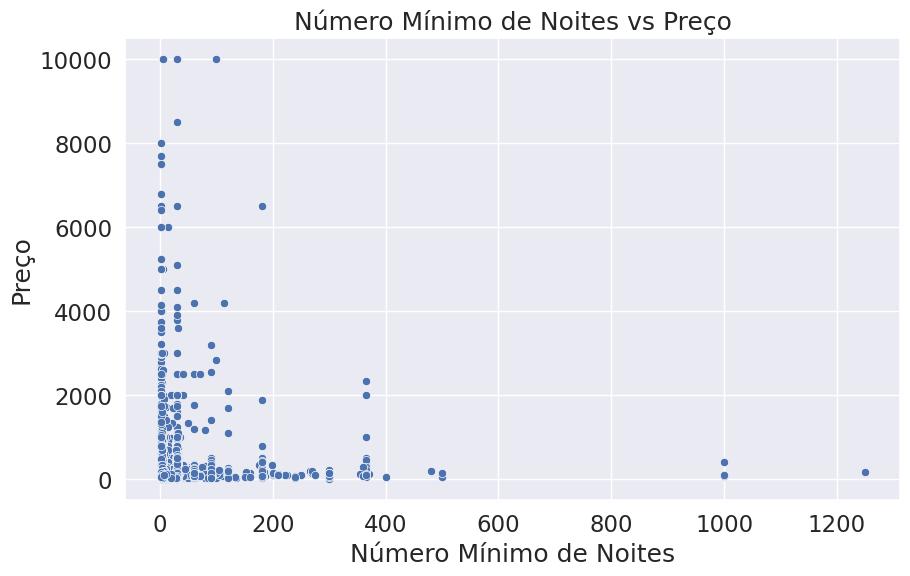

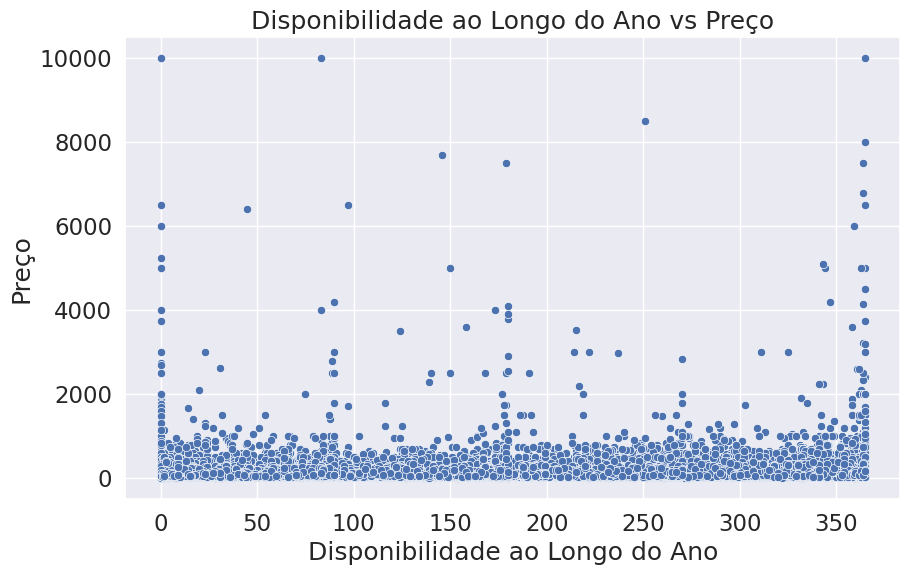

In [775]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minimo_noites', y='price', data=dataf)
plt.title('Número Mínimo de Noites vs Preço')
plt.xlabel('Número Mínimo de Noites')
plt.ylabel('Preço')
plt.show()

# Gráfico de dispersão para disponibilidade ao longo do ano vs preço
plt.figure(figsize=(10, 6))
sns.scatterplot(x='disponibilidade_365', y='price', data=dataf)
plt.title('Disponibilidade ao Longo do Ano vs Preço')
plt.xlabel('Disponibilidade ao Longo do Ano')
plt.ylabel('Preço')
plt.show()

In [776]:
correlation_matrix = dataf[['minimo_noites', 'disponibilidade_365', 'price']].corr()
print(correlation_matrix)

                     minimo_noites  disponibilidade_365  price
minimo_noites                 1.00                 0.14   0.04
disponibilidade_365           0.14                 1.00   0.08
price                         0.04                 0.08   1.00


###Pergunta C

No questionamento de que o nome realiza uma alteração nos resultados de vendas do host, pode ser realizada uma função, que visualiza as palavras mais comuns utilizadas pelos hosts, e separa-los em tipos , como os que cobram mais , cobram menos e os mais populares, assim pode-se analizar, se existem padrões no texto do nome do local para lugares com mais alto valor.




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


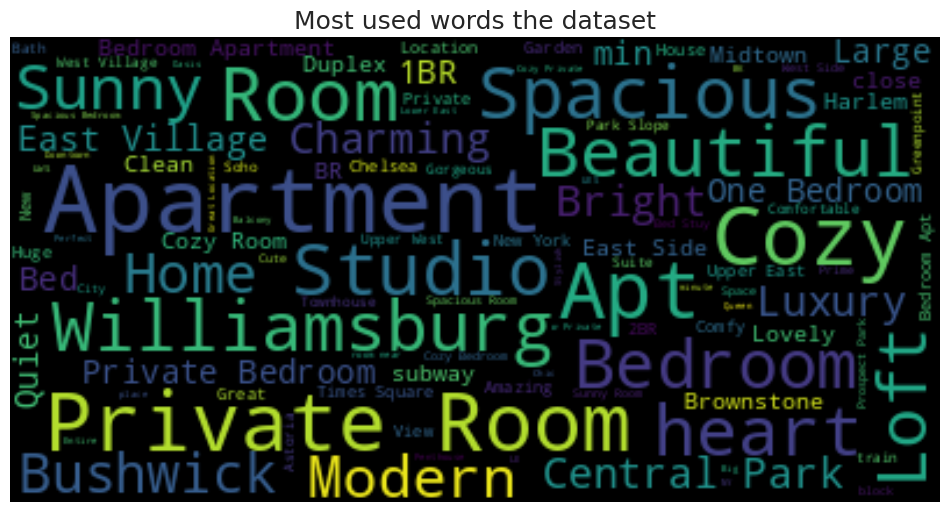

In [777]:
UNWANTED_WORDS = set(['manhattan', 'queen', 'brooklyn', 'nyc'])
nltk.download('punkt')
fig, ax = plt.subplots(figsize=(12,8))

text = functools.reduce(lambda a,b: a + " " + str(b), dataf.sample(frac=0.3)['nome'])
text = ' '.join([w for w in nltk.word_tokenize(text) if w.lower() not in UNWANTED_WORDS])

wc = wordcloud.WordCloud(max_font_size=40).generate(text)
ax.imshow(wc, interpolation='bilinear')
ax.set_title("Most used words the dataset")
plt.axis("off")
fig.show()

Palavras mais utilizadas pelos hosts no geral

In [778]:
def get_top_terms(documents, ngram_range=(1,1), unwanted_words=set(), min_occurrences=1):

    blacklist = list(set(stopwords.words('english')).union(unwanted_words))
    vec = CountVectorizer(stop_words = blacklist, ngram_range=ngram_range)
    sum_words = vec.fit_transform(documents).sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

    if min_occurrences > 1:
        words_freq = list(filter(lambda x: x[1] >= min_occurrences, words_freq))
    return words_freq

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


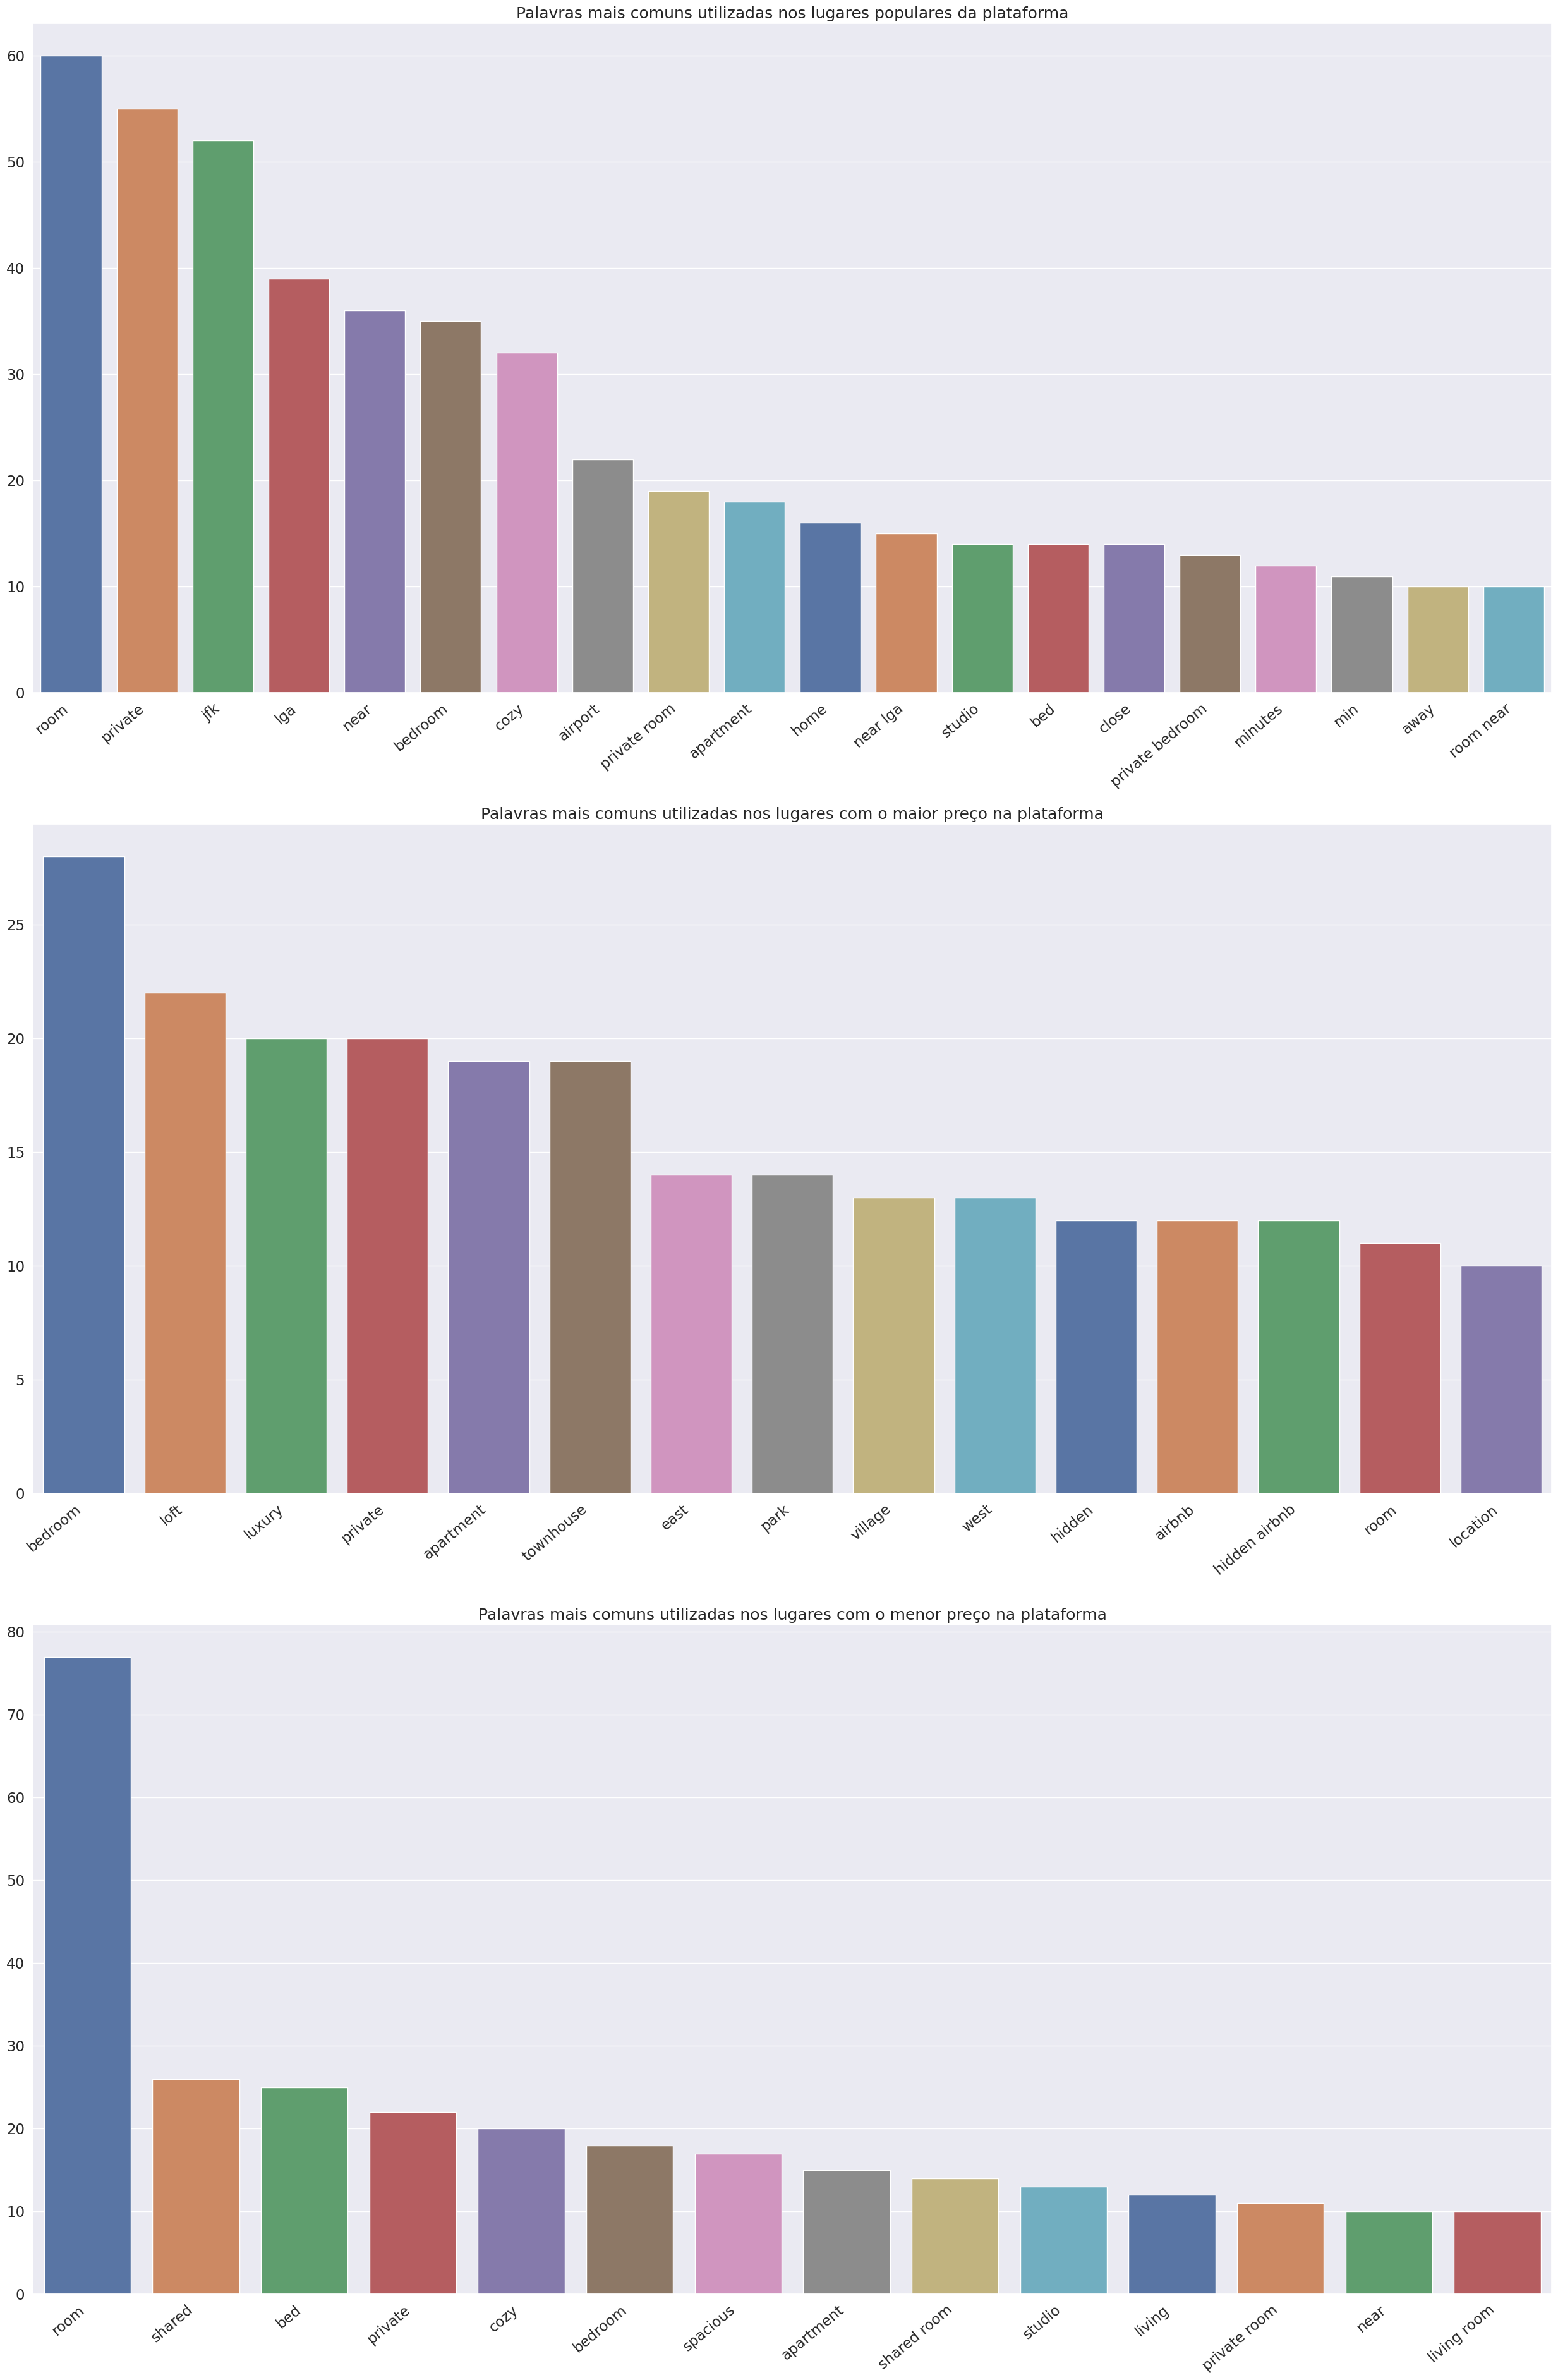

In [779]:
nltk.download('stopwords')
fig, ax = plt.subplots(3, 1, figsize=(25, 38))
# Primeiro subplot
top_ngrams = get_top_terms(dataf.sort_values('reviews_por_mes', ascending=False)['nome'].iloc[:200], ngram_range=(1,2), unwanted_words=UNWANTED_WORDS, min_occurrences=10)
sns.barplot(x=[x[0] for x in top_ngrams], y=[x[1] for x in top_ngrams], ax=ax[0], palette=("deep"))
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")
ax[0].set_title('Palavras mais comuns utilizadas nos lugares populares da plataforma')

# Segundo subplot
top_ngrams = get_top_terms(dataf.sort_values('price', ascending=False)['nome'].iloc[:200], ngram_range=(1,2), unwanted_words=UNWANTED_WORDS, min_occurrences=10)
sns.barplot(x=[x[0] for x in top_ngrams], y=[x[1] for x in top_ngrams], ax=ax[1], palette=("deep"))
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")
ax[1].set_title('Palavras mais comuns utilizadas nos lugares com o maior preço na plataforma')

# Terceiro subplot
top_ngrams = get_top_terms(dataf.sort_values('price', ascending=True)['nome'].iloc[:200], ngram_range=(1,2), unwanted_words=UNWANTED_WORDS, min_occurrences=10)
sns.barplot(x=[x[0] for x in top_ngrams], y=[x[1] for x in top_ngrams], ax=ax[2], palette=("deep"))
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=40, ha="right")
ax[2].set_title('Palavras mais comuns utilizadas nos lugares com o menor preço na plataforma')



plt.tight_layout()
plt.show()


É possível analisar a partir do resultado gráfico, que existe sim um padrão de palavras utilizdas pelos lugares com um maior preço da plataforma, tendo em vista que eles tendem a ser mais descritivos.

##Entrega 3 e 4

No projeto, a previsão de preços foi realizada por meio de uma regressão linear, empregando um método de aprendizado de máquina com a biblioteca scikit-learn.


O modelo de regressão linear foi selecionado devido à sua simplicidade e facilidade de interpretação, tornando-o uma escolha apropriada para este problema. No entanto, é importante observar que, devido à sua natureza linear, pode não capturar relações complexas ou não-lineares nos dados, o que exigiu de manipulações específicas do conjunto de dados para se encaixar no modelo, além de que o modelo é muito sujeito á variabilidades, o que necessita de um tratamento mais bruto dos dados nesse quesito também.

In [780]:
colunas_categoricas = []
colunas_categoricas.append("bairro_group")
colunas_categoricas.append("room_type")
colunas_categoricas

['bairro_group', 'room_type']

primeiro, cria-se uma lista vazia para armazenar as colunas categóricas e adiciona-se as colunas "bairro_group" e "room_type" a essa lista.

In [781]:
dataset = pd.get_dummies(dataf, columns=colunas_categoricas)

Utilizando a função pd.get_dummies(), as colunas categóricas são convertidas em variáveis dummy no conjunto de dados. Este passo é importante tendo em vista que ela ajuda o algoritmo de machine learning a compreender e interpretar os dados de forma mais eficaz, pois transforma as informações categóricas em uma representação binária.

In [782]:
colunas_selecionadas = ['host_id', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes',
                'calculado_host_listings_count', 'disponibilidade_365']
dataset[colunas_selecionadas] = StandardScaler().fit_transform(dataset[colunas_selecionadas])
dataset['bairro'] = LabelEncoder().fit_transform(dataset['bairro'])

As colunas relevantes são selecionadas e normalizadas, enquanto a coluna de 'bairro' é codificada numericamente, preparando os dados para o modelo de machine learning.

In [783]:
X = dataset.drop(['nome', 'price', 'ultima_review','host_name'], axis=1)
y = dataset.price

apt_teste = dataset.iloc[0]
apt_teste = apt_teste.drop(['nome', 'price', 'ultima_review','host_name'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
apt_teste

host_id                          -0.86
bairro                             127
latitude                         40.75
longitude                       -73.98
minimo_noites                    -0.29
numero_de_reviews                 0.49
reviews_por_mes                  -0.66
calculado_host_listings_count    -0.16
disponibilidade_365               1.84
bairro_group_Bronx                   0
bairro_group_Brooklyn                0
bairro_group_Manhattan               1
bairro_group_Queens                  0
bairro_group_Staten Island           0
room_type_Entire home/apt            1
room_type_Private room               0
room_type_Shared room                0
Name: 0, dtype: object

As variáveis de entrada (X) e de saída (y) são definidas, e é retirado um exemplo 20% dos dados do dataset para de teste, sendo que os outros 80% serão utilizados para treinamento.
Estes valores de 20/80 são arbitrários, sendo os que tiveram melhores respostas por meio de testes.

uma variável apt_teste é criada, para realizar o teste da entrega 4, no qual é dado um host específico para ser dado um preço.

O print de apt_teste devolve os dados deste cliente já filtrados e normalizados.

In [784]:
def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)# Erro absoluto em relação a média absoluta
    mse = metrics.mean_squared_error(true, predicted)# Erro da média ao quadrado (Variancia)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))# Obtenção da média
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

* MAE(Mean Absolute Error): Fornece uma ideia da magnitude média dos erros no conjunto de dados, sendo assim, Quanto menor o  seu valor melhor o desempenho do modelo.

* MSE (Mean Squared Error): Penaliza erros maiores mais do que erros menores, tornando-o sensível a grandes desvios. Quanto menor o valor do MSE, melhor o desempenho do modelo.

* RMSE (Root Mean Squared Error): Fornece uma medida do desvio padrão dos erros e é mais interpretável do que o MSE, pois está na mesma unidade que a variável dependente. Quanto menor o valor do RMSE, melhor o desempenho do modelo.

* R² (R-squared): Varia de 0 a 1 e indica a proporção da variabilidade na variável dependente que é explicada pelo modelo. Um valor de R² mais próximo de 1 indica um ajuste melhor do modelo aos dados, enquanto um valor mais próximo de 0 indica um ajuste pobre.




In [785]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [786]:
valores_previstos = lin_reg.predict(X_test)
print_evaluate(y_test, valores_previstos)

MAE: 71.98099519491687
MSE: 35920.272510124676
RMSE: 189.52644277283494
R2 Square 0.13428607283837213


* MAE (Erro Absoluto Médio): 71.98

Indica que, em média, as previsões do modelo têm uma diferença absoluta de 71.98 unidades da variável alvo (preço).
* MSE (Erro Quadrático Médio): 35920.27

Sugere que as previsões do modelo, em média, estão a uma certa distância dos valores reais.

* RMSE (Raiz do Erro Quadrático Médio): 189.53

Em média, as previsões do modelo estão a cerca de 189.53 unidades de distância dos valores reais.
* R² (R-quadrado): 0.134

Indica que aproximadamente 13.4% da variabilidade na variável de resposta (preço) é explicada pelo modelo.

Apesar de ainda existir muito espaço para melhoria, principalmente no tratamento de variabilidades, esses resultados indicam que o modelo tem um desempenho modesto na previsão do preço.

In [787]:
print("Preço médio de todos os valores da saída","$:",y.mean())

Preço médio de todos os valores da saída $: 152.7207632838385


In [788]:
valor_previsto = lin_reg.predict([apt_teste])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [789]:
print("Novo preço para o apartamento da entrega 4 em","$:",valor_previsto[0])

Novo preço para o apartamento da entrega 4 em $: 284.0699458333511


O valor dado pela máquina foi um satisfatório , tendo em vista que se aproxima com o valor prévio do próprio dataset.

In [792]:
with open('modelo_regressao.pkl', 'wb') as arquivo_pkl:
    pickle.dump(lin_reg, arquivo_pkl)